In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

os.getcwd()

'/Users/anshumantewary/Downloads/IPBA/Python/Codes'

In [3]:
data = pd.read_csv('/Users/anshumantewary/Downloads/IPBA/Python/Module 5- Predictive Analytics/1. Linear Regression in Python Demo Part 1/mktmix.csv')

In [4]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [5]:
data.shape

(104, 9)

In [6]:
data.dtypes

NewVolSales            int64
Base_Price           float64
Radio                float64
InStore              float64
NewspaperInserts      object
Discount             float64
TV                   float64
Stout                float64
Website_Campaign      object
dtype: object

In [7]:
print(data['Base_Price'].describe())

count    104.000000
mean      15.306740
std        0.528902
min       13.735724
25%       15.029276
50%       15.332887
75%       15.642632
max       16.281020
Name: Base_Price, dtype: float64


<AxesSubplot:ylabel='Frequency'>

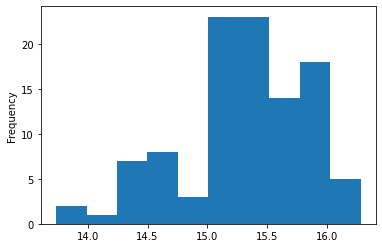

In [8]:
#possibility that data is negatively skewed

data.Base_Price.plot(kind = 'hist')

<AxesSubplot:>

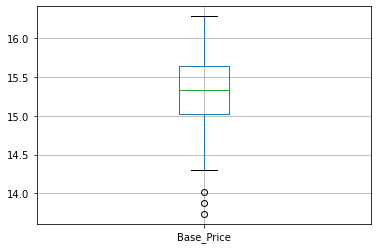

In [9]:
data.boxplot(column = 'Base_Price')

#We see some extreme values and potential outliers at the bottom of the plot

In [10]:
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.0    13.735724
0.1    14.585093
0.2    14.969458
0.3    15.029276
0.4    15.180322
0.5    15.332887
0.6    15.486985
0.7    15.642632
0.8    15.799843
0.9    15.958634
Name: Base_Price, dtype: float64

In [11]:
#Lets see what value lies at <= 1% of the data, i.e we check the quantile value at 0.01

q = data['Base_Price'].quantile(0.01)
print(q)

13.8779529113


In [12]:
#Now lets see how many values are below this, so that we can determine whether to treat them as outliers or data

data.loc[data['Base_Price'] < q]

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
74,24468,13.735724,251.0,37.836,NaN,0.051046,135.152309,2.66283,NaN
76,21710,13.873770,261.0,34.215,NaN,0.000000,148.705708,2.97774,NaN


In [13]:
#Lets treat them with the avg

avg = data['Base_Price'].mean()

In [14]:
data.loc[(data['Base_Price'] < q), 'Base_Price'] = avg #Replacing the outliers in base_price with avg

data.Base_Price.describe()

count    104.000000
mean      15.335624
std        0.484765
min       14.013204
25%       15.029276
50%       15.332887
75%       15.642632
max       16.281020
Name: Base_Price, dtype: float64

In [15]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [16]:
data.NewVolSales.describe()

count      104.000000
mean     20171.067308
std       1578.604670
min      17431.000000
25%      19048.750000
50%      19943.500000
75%      20942.750000
max      24944.000000
Name: NewVolSales, dtype: float64

<AxesSubplot:ylabel='Frequency'>

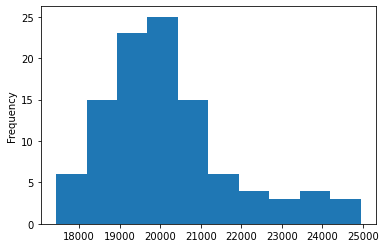

In [17]:
data.NewVolSales.plot(kind = 'hist')

In [18]:
data['Radio '].isna().sum()

4

In [19]:
#Lets impute the values with the mean using sklearn imputer

data['Radio ']= data['Radio '].fillna(data['Radio '].mean())

data['Radio '].describe()

#Missing values imputed

count    104.000000
mean     256.690000
std       85.288738
min        0.000000
25%      235.750000
50%      276.000000
75%      312.250000
max      399.000000
Name: Radio , dtype: float64

<AxesSubplot:xlabel='NewVolSales', ylabel='Base_Price'>

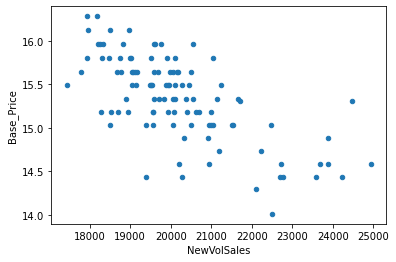

In [20]:
#Lets look at some bivariate plots to understand the relation between various factors and volume sales

data.plot(x = "NewVolSales", y = "Base_Price", kind = 'scatter')

In [21]:
#Let's observe the pearsons correlation to get the relation of each data
pd.options.display.float_format = '{:.2f}'.format  #How to format data to show 2 upto 2 decimal places
data.corr('pearson')

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.00,-0.68,0.05,0.44,0.42,0.15,-0.38
Base_Price,-0.68,1.00,-0.00,-0.24,-0.20,0.07,0.02
Radio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19
InStore,0.44,-0.24,-0.02,1.00,0.72,-0.02,0.03
Discount,0.42,-0.20,0.11,0.72,1.00,0.12,-0.03
TV,0.15,0.07,-0.06,-0.02,0.12,1.00,-0.13
Stout,-0.38,0.02,-0.19,0.03,-0.03,-0.13,1.00


<AxesSubplot:>

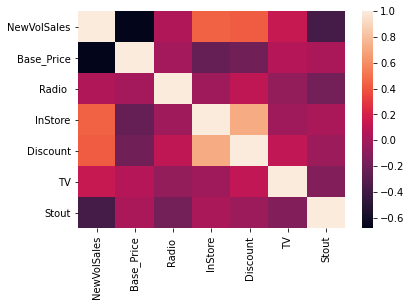

In [22]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr)

In [23]:
def d(x):
    if x<15:
        return "LOW"
    elif 15<=x<15.33:
        return "MEDIUM"
    else:
        return "HIGH"
    
data['bkt_price']=data['Base_Price'].map(d)

In [24]:
data['bkt_price'].value_counts()

HIGH      60
MEDIUM    25
LOW       19
Name: bkt_price, dtype: int64

In [25]:
#Lets create dummies for the marketing campaigns

data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,bkt_price
0,19564,15.03,245.00,15.45,NaN,0.00,101.78,2.28,NaN,MEDIUM
1,19387,15.03,314.00,16.39,NaN,0.00,76.73,2.22,NaN,MEDIUM
2,23889,14.59,324.00,62.69,NaN,0.05,131.59,2.01,NaN,LOW
3,20055,15.33,298.00,16.57,NaN,0.00,119.63,2.20,NaN,HIGH
4,20064,15.64,279.00,41.50,NaN,0.04,103.44,1.82,NaN,HIGH


In [26]:
data['NewspaperInserts'] = data.NewspaperInserts.fillna('0')

In [27]:
data['NewspaperInserts'].value_counts()

0         98
Insert     6
Name: NewspaperInserts, dtype: int64

In [28]:
data = pd.get_dummies(data, columns = ['NewspaperInserts'])

In [29]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Website_Campaign,bkt_price,NewspaperInserts_0,NewspaperInserts_Insert
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,NaN,MEDIUM,1,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,NaN,MEDIUM,1,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,NaN,LOW,1,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,NaN,HIGH,1,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,NaN,HIGH,1,0


In [30]:
data['NewspaperInserts_Insert'].value_counts()

0    98
1     6
Name: NewspaperInserts_Insert, dtype: int64

In [31]:
data = data.drop(['NewspaperInserts_0'], axis = 1)

In [32]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Website_Campaign,bkt_price,NewspaperInserts_Insert
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,NaN,MEDIUM,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,NaN,MEDIUM,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,NaN,LOW,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,NaN,HIGH,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,NaN,HIGH,0


In [33]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Website_Campaign,bkt_price,NewspaperInserts_Insert
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,NaN,MEDIUM,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,NaN,MEDIUM,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,NaN,LOW,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,NaN,HIGH,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,NaN,HIGH,0


In [59]:
data['NewspaperInserts_Insert'].value_counts()

data.rename(columns = {'Radio ': 'Radio'}, inplace = True)

data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'Discount', 'TV',
       'Stout', 'Website_Campaign ', 'bkt_price', 'NewspaperInserts_Insert'],
      dtype='object')

In [61]:
import statsmodels.formula.api as smf

reg = smf.ols('NewVolSales~Base_Price+Radio+InStore+Discount+TV+Stout+bkt_price+NewspaperInserts_Insert', data = data)

results = reg.fit()  #saving the results in 'results' object

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NewVolSales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     26.58
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           3.43e-22
Time:                        00:59:41   Log-Likelihood:                -847.15
No. Observations:                 104   AIC:                             1714.
Df Residuals:                      94   BIC:                             1741.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.133e+04   6432.504      7.979      0.000    3.86e+04    6.41e+04
bkt_price[T.LOW]          282.2443    535.446      0.527      0.599    -780.896    1345.385
bkt_price[T.MEDIUM]       -59.7065    315.262     -0.189      0.850    -685.666     566.253
Base_Price              -1832.1065    408.325     -4.487      0.000   -2642.846   -1021.367
Radio                      -0.5307      1.073     -0.495      0.622      -2.661       1.600
InStore                    24.3405      9.568      2.544      0.013       5.342      43.339
Discount                 6679.3201   4714.418      1.417      0.160   -2681.267     1.6e+04
TV                          4.7220      2.116      2.231      0.028       0.520       8.924
Stout                   -1798.7786    287.171     -6.264      0.000   -2368.964   -1228.593
NewspaperInserts_Insert    98.1783    376.918      0.260      0.795    -650.202     846.558
==============================================================================
Omnibus:                       46.766   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.643
Skew:                           1.492   Prob(JB):                     5.35e-38
Kurtosis:                       8.541   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#Re-iterating the model with features that are seemed significant

reg1 = smf.ols('NewVolSales~Base_Price+InStore+Discount+TV+Stout', data = data)

results1 = reg1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NewVolSales   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     48.96
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           3.69e-25
Time:                        01:05:34   Log-Likelihood:                -847.84
No. Observations:                 104   AIC:                             1708.
Df Residuals:                      98   BIC:                             1724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.335e+04   2906.278     18.357      0.000    4.76e+04    5.91e+04
Base_Price -1979.5109    181.903    -10.882      0.000   -2340.491   -1618.530
InStore       25.3964      9.151      2.775      0.007       7.236      43.557
Discount    6967.9628   4521.487      1.541      0.127   -2004.781    1.59e+04
TV             4.9577      2.040      2.430      0.017       0.909       9.006
Stout      -1771.9672    277.691     -6.381      0.000   -2323.036   -1220.898
==============================================================================
Omnibus:                       40.183   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.062
Skew:                           1.319   Prob(JB):                     6.97e-28
Kurtosis:                       7.680   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

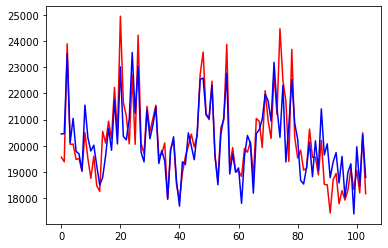

In [66]:
predictions = results1.predict(data)

actuals = data['NewVolSales']

plt.plot(actuals, 'r')
plt.plot(predictions, 'b')
plt.show()

In [67]:
#Lets now take a look at the resuiduals or errors

residuals = results1.resid
type(residuals)

pandas.core.series.Series

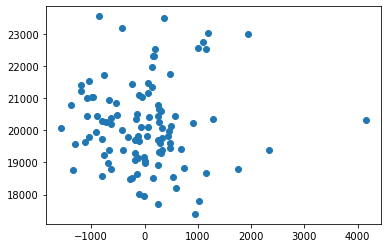

In [70]:
residualsdf = pd.DataFrame(residuals)

plt.scatter(residualsdf, predictions)

#residuals are random and there is no such pattern in it



In [71]:
#Lets calculate the mean absolute percentage error (MAPE)

np.mean(abs((actuals - predictions)/actuals)) #MAPE

0.029734801801073758